# Linear Regression
Study relationships between two continuous (quantitative) variables.
- One variable, denoted $x$, is regarded as the predictor, explanatory, or independent variable.
 
- Other variable, denoted $y$, is regarded as the response, outcome, or dependent variable.
- Define variables: observed responses, $y_i$; predictor values, $x_i$; predicted responses, $\widehat{y}_i$; mean of all of the x-values, $\overline{x}$; mean of all of the y-values, $\overline{y}$.
- Equation for the best fitting line is $\widehat{y}_i = \beta_0 + \beta_1 x_i$.
- Best fitted line - one which minimizes the sum of the prediction errors/residuals, i.e., minimizes $\sum_{i=0}^n e_i = \sum_{i=0}^n (y_i - \widehat{y}_i)^2$ when there are $n$ data points.
- Minimization $\rightarrow$ take derivatives of $\sum_{i=1}^n e_i$ w.r.t $\beta_0$ and $\beta_1$, set to 0 and solve for $\beta_0$ and $\beta_1$.
- ## $\beta_0 = \overline{y} - \beta_1 \overline{x}$
- ## $\beta_1 = \frac{\sum_{i=1}^n (x_i - \overline{x} )(y_i - \overline{y} )}{\sum_{i=1}^n (x_i - \overline{x})^2}$
 <br>
- $\beta_0$ tells the estimated regression equation at $x = 0$, if the 'scope of the model' includes $x = 0$, otherwise, $\beta_0$ is not meaningful.
- $\beta_1$ is the amount by which the mean response may vary for every one unit increase in $x$.

#### <font color = blue> Assumptions
-- mean of the response at each value of the predictor, $x_i$, is a ***Linear*** function of the $x_i$.
 <br>
-- errors/residuals, $e_i$, are ***Independent***.
 <br>
-- errors, $e_i$, at each value of $x_i$, are ***Normally distributed***.
 <br>
-- errors, $e_i$, at each value of $x_i$, have ***Equal variances***.
   <br>
-- variance of the residuals/errors must be ***Constant***.
 <br>
-- residuals should be ***multivariate normally distributed***.

#### <font color = blue> Disadvantages
- over-fitting
- sensitive to outliers
- valid for normally distributed data
- computationally expensive, for large data
    
    
###  <font color = red> Questions
1. What happens to coefficients $\beta_0$ and $\beta_1$ if one of the $x_i$'s are scaled?
2. What happens to coefficients $\beta_0$ and $\beta_1$ if all $x_i$'s are scaled? Do they remain same as the original one?
3. How to check if the data is normally distributed?
4. How to check for linear independence of the data?

### <font color = green> Answers
1. If only one $x_i$ is scaled, then (see example).
2. If all $x_i$'s are scaled, then there is no change in the result (see example).

# <font color = blue> Linear Regression Model without using scikit-learn package
## Some random data points are generated and a linear regression model is fitted to it.
1. Vanilla implementation for closed form solution
2. Vanilla implementation with stochastic gradient descent

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

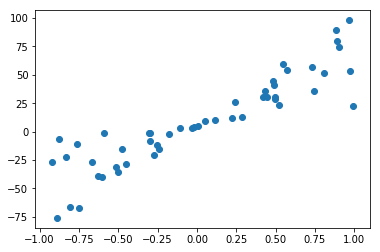

In [2]:
# Generate some random data points

x = np.random.uniform(-1, 1, 50)
y = 5 + x*np.random.uniform(10, 100, 50)
plt.scatter(x,y)
plt.show()

### 1. Vanilla implementation for closed form solution

In [3]:
# define various functions and develop the linear regression model
# which gives this solution: y = \beta_0 + x * \beta_1
# \beta_0 is the intercept and \beta_1 is the slope of the curve.

def mean_val(x):
    return np.mean(x)

def var(x):
    return np.var(x)

def cov(x, y):
    return np.cov(x, y)[0, 1]


class LinearRegressionClosed:
    b0, b1 = None, None
    
    def model_fit(self, X, Y):
        self.b1 = cov(X, Y)/var(X)
        self.b0 = mean_val(Y) - self.b1 * mean_val(X)
        
    def model_predict(self, X):
        y = []
        for x in X:
            y.append(self.b0 + self.b1 * x)
        return y
        
    def model_coeff(self):
        return self.b0, self.b1

In [4]:
m = LinearRegressionClosed()
m.model_fit(x, y)
y_pred = m.model_predict(x)
print('coefficients for the model are: intercept = ', m.model_coeff()[0],
     ' and slope = ', m.model_coeff() [1])

coefficients for the model are: intercept =  7.68453078837  and slope =  61.3019973868


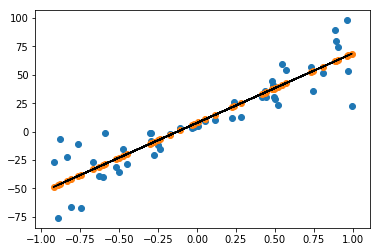

In [5]:
# plot the result to check how well the model does

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'black')

plt.scatter(x, y_pred)

plt.show()

### 2. Vanilla implementation with SGD

### Stochastic Gradient Descent (SGD)
It is an iterative method to minimize the objective function, by selecting random samples.

For details check http://deeplearning.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/ and https://scikit-learn.org/stable/modules/sgd.html

In [6]:
class LinearRegressionSGD:
    weights = None
    
    def model_fit(self, features, target, num_steps, lr, add_intercept = False):
        
        weights = np.random.normal(size=(features.shape[1],1))

        for step in range(num_steps):
            scores = np.matmul(features, weights)
            gradients = np.matmul(features.T, scores-target)
            weights -= lr * gradients
            
            #Print Loss every so often
            if step % 500 == 0:
                j = np.sum((np.square(scores-target)))
                #print("Loss is in iteration "+str(step) + ": "+ str(j))                
        self.weights = weights
  
    def model_predict(self, features):
        return np.matmul(features, self.weights)

In [7]:
m = LinearRegressionSGD()


x_new =  x.reshape((x.shape[0], -1))
y_new = y.reshape((y.shape[0], -1))


m.model_fit(x_new, y_new, 50, 0.01)
y_pred = m.model_predict(x_new)

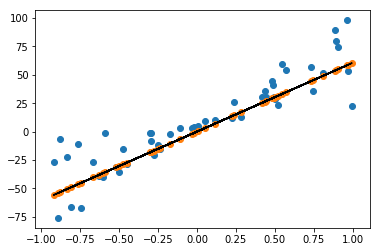

In [8]:
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.plot(x_new, y_pred, color = 'black')
plt.show()

## Examples of Linear Regression Model Solved Using scikit-learn
Here is a simple example of how to use Linear Regression to analyze different datasets.
1. Random data set (discussed in the previous section).
2. The Diabetes dataset. This contains the records of 442 patients and 10 attributes for each individual which affects this disease progression in one year. This is standardized (meaning the values of the attributes don't repesent the exact physical values in the original paper).
<br>
This dataset is taken from [scikit-learn package](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes).
3. The Boston house prices dataset. This contains 506 houses, their prices and 13 attributes which can affect the prices.
<br>
This dataset is taken from the [scikit-learn package](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston). 

In [50]:
import sklearn.linear_model as slm

In [246]:
m = slm.LinearRegression()
m.fit(x_new, y_new)

y_pred = m.predict(x_new)

print('coefficients for the model are: intercept = ', m.intercept_[0],
     ' and slope = ', m.coef_[0][0])

print('model accuracy = ', m.score(x_new, y_new))

coefficients for the model are: intercept =  5.46704293694  and slope =  56.2530270284
model accuracy =  0.848880176564


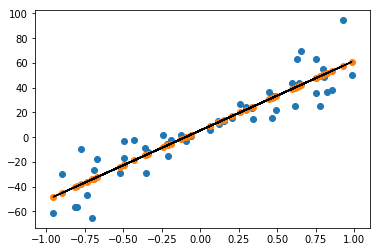

In [247]:
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.plot(x_new, y_pred, color = 'black')
plt.show()

## Linear Regression model for Diabetes Data

In [2]:
from sklearn.datasets import load_diabetes
load_diabetes()

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [5]:
print('First few lines of the dataframe showing the numerical values of the attributes')
df = pd.DataFrame(load_diabetes().data, columns = load_diabetes().feature_names)
print('(Number of patients, Number of attributes) =', df.shape)
print(df.head())

First few lines of the dataframe showing the numerical values of the attributes
(Number of patients, Number of attributes) = (442, 10)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [17]:
print('Check for missing/empty entries in the attributes')
#print(df.isnull().sum())
column = [x for x in df if 'NaN' in str(df[x])]
if len(column) != 0:
    print(column, 'needs cleaning')
    df = df.fillna(0)
    print('filled empty columns with 0')
    ## insert when filling up empty columns with mean value of the previous/next entry
    
print('No missing data in attributes.')

Check for missing/empty entries in the attributes
No missing data in attributes.


### Case 1: Use all the features to find fit a linear regression model.
1. To do this, split the given data into training and testing data.
2. Fit a model and check how good this model is, by calculating the accuracy.
3. Draw the fitted curve.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df, load_diabetes().target, test_size = 0.2, random_state = 0)

# set up the model
model1 = slm.LinearRegression()

#fit this model to the training data
model1.fit(x_train, y_train)

#predict the values for the test data using this model
y_pred = model1.predict(x_test)

In [36]:
# check the accuracy of this model by checking how it performs with the test data
# Explained variance score: 1 is perfect prediction
print('Variation/Accuracy score: ', r2_score(y_test, y_pred))

# the mean squared error for this model
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

# print the coefficients of the model
print('Coefficients for the model are ', model1.coef_)

# print the intercept of the lineara model
print('Intercept value for the model: ', model1.intercept_)

Variation/Accuracy score:  0.332222032691
Mean squared error:  3424.31668821
Coefficients for the model are  [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]
Intercept value for the model:  152.53813352


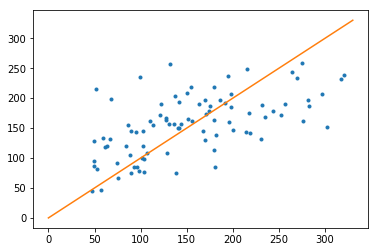

If the model would predict perfectly (i.e., accuracy ~ 1), the predicted valueswould all fall on the straight/linear line. For this case, the accuracy is only 0.33and the prediction is not that good.


In [38]:
# Plot the results
plt.plot(y_test, y_pred, '.')

x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)

plt.show()

print('If the model would predict perfectly (i.e., accuracy ~ 1), the predicted values ' +
      'would all fall on the straight/linear line. For this case, the accuracy is only 0.33' +
     'and the prediction is not that good.')

#### <font color = blue> We can see that this model does not do a good job in predicting the test cases. This could be because we need a polynomial regression since we have multiple features contributing to the result. Another way to solve this is to find out the most important features which contribute to the prediction.

In [65]:
from sklearn.datasets import load_boston
load_boston()
df = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


## Hacker Rank ML questions

The following is for predicting the cost of houses, given there are two features and the test data (for which to predict the price) is below the training one.

In [ ]:
import numpy as np
from sklearn import linear_model as lm
from sklearn import preprocessing as pp

F, N = map(int, input().split())

train = np.array([input().split() for _ in range(N)], float)
T = int(input())
test = np.array([input().split() for _ in range(T)], float)

X_train = train[:,:-1]
y_train = train[:,-1]

model = lm.LinearRegression()
topoly = pp.PolynomialFeatures(2)
model.fit(topoly.fit_transform(X_train), y_train)

y_pred = model.predict(topoly.fit_transform(test))
print(*y_pred, '\n')




import sklearn.linear_model as slm
import sklearn.preprocessing as spp
import numpy as np

clf = slm.LinearRegression()
F, N = map(int, input().split())

data = np.array([input().split() for _ in range(N)], float)
train_data = data[:, :-1]
price_data = data[:, [-1]]

T = int(input())
test_data = np.array([input().split() for _ in range(T)], float)

clf.fit(train_data, price_data)
predicted = clf.predict(test_data)
for x in predicted:
    print(round(float(x),2))